In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
# sns.set(style="darkgrid")
df = pd.read_csv("1stage.csv")
df = df.T.reset_index()

In [3]:
df

,index,0,1,2,3,4,5,6
0,Testbench,vvadd,towers,rsort,qsort,multiply,meidan,dhrystone
1,Arithmetic,45.878,41.702,59.58,38.382,63.151,31.845,40.379
2,Ld/St,30.573,42.197,34.87,31.471,4.883,32.147,35.324
3,Branch/Jump,22.468,15.388,4.398,29.825,31.618,35.193,23.757
4,Misc.,1.081,0.714,1.152,0.322,0.348,0.815,0.541


In [4]:
col1 = df[0][1:]
col2 = df[1][1:]
col3 = df[2][1:]
col4 = df[3][1:]
col5 = df[4][1:]
col6 = df[5][1:]
col7 = df[6][1:]
col0 = df['index'][1:]

n_col1 = np.concatenate((col1, col2,col3,col4,col5,col6,col7))
n_col2 = np.concatenate((col0, col0, col0, col0,col0,col0,col0))
n_col3 = np.array(['vvadd'] * 4 + ['towers'] * 4 + ['rsort'] * 4+ ['qsort'] * 4 + ['multiply'] * 4 + ['median'] * 4 + ['dhrystone'] * 4)

<AxesSubplot: xlabel='Inst.', ylabel='percentage'>

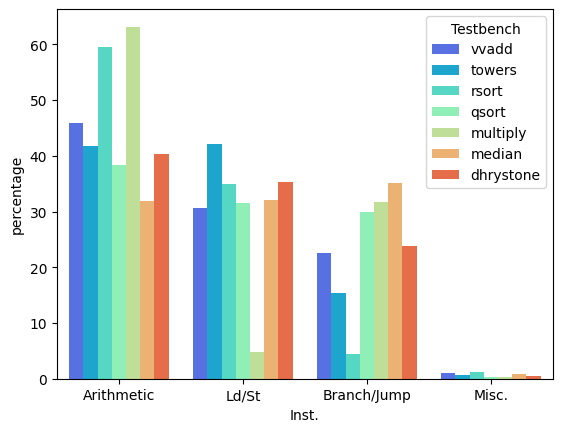

In [5]:
ddf = pd.DataFrame()
ddf['percentage'] = n_col1
ddf['Inst.'] = n_col2
ddf['Testbench'] = n_col3

sns.barplot(data=ddf, x='Inst.', y="percentage", hue = "Testbench",palette="rainbow")

In [17]:
df = pd.read_csv("1stage.csv")

# df = df.reset_index()  # make sure indexes pair with number of rows


for index, row in df.iterrows():
    tb = row["Testbench"]
    CPI_base = row["Arithmetic"] * 1 + row["Ld/St"]*2 + (row["Branch/Jump"] + row["Misc."]) * 1.5
    CPI_op = row["Arithmetic"] * 1 + row["Ld/St"]*1 + (row["Branch/Jump"] + row["Misc."]) * 1.5
    judge = "is" if CPI_op * 1.3 < CPI_base else "is NOT"
    print(f"The CPI for {tb} is {CPI_base/100} with 2-cycle load/store, and is {CPI_op/100} with 1-cycle load/store, and it {judge} worth it.")
    print()


the CPI for vvadd is 1.423475 with 2-cycle load/store, and is 1.117745 with 1-cycle load/store, and it is NOT worth it.

the CPI for towers is 1.5024899999999999 with 2-cycle load/store, and is 1.08052 with 1-cycle load/store, and it is worth it.

the CPI for rsort is 1.3764499999999997 with 2-cycle load/store, and is 1.02775 with 1-cycle load/store, and it is worth it.

the CPI for qsort is 1.4654449999999999 with 2-cycle load/store, and is 1.150735 with 1-cycle load/store, and it is NOT worth it.

the CPI for multiply is 1.20866 with 2-cycle load/store, and is 1.1598300000000001 with 1-cycle load/store, and it is NOT worth it.

the CPI for meidan is 1.50151 with 2-cycle load/store, and is 1.18004 with 1-cycle load/store, and it is NOT worth it.

the CPI for dhrystone is 1.47474 with 2-cycle load/store, and is 1.1215000000000002 with 1-cycle load/store, and it is worth it.

